In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv("/content/drive/MyDrive/WPM/Dataset11-Weather-Data.csv")
print(data.head())

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(data.shape)
print("")
print(data.columns)
print("")
print(data.dtypes)
print("")
print(data.info())

(8784, 8)

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), 

In [ ]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [ ]:
data.Weather.unique()
data.Weather.nunique()

50

In [ ]:
x='Thunderstorms,Moderate Rain Showers,Fog'

In [ ]:
list_of_lists=[w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [ ]:
from itertools import chain
flat_list=list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [ ]:
def Create_list(x):
     list_of_lists=[w.split() for w in x.split(',')]
     flat_list=list(chain(*list_of_lists))
     return flat_list



def Get_Weather(list1):
     if 'Fog' in list1 and 'Rain' in list1:
         return 'RAIN+FOG'
     elif 'Snow' in list1 and 'Rain' in list1:
          return 'SNOW+RAIN'
     elif 'Snow' in list1:
          return 'SNOW'
     elif 'Rain' in list1:
          return 'RAIN'
     elif 'Fog' in list1:
          return 'FOG'
     elif 'Clear' in list1:
          return 'CLEAR'
     elif 'Cloudy' in list1:
          return 'CLOUDY'
     else:
          return'RAIN'

In [ ]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [ ]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [ ]:
data['Std_Weather']=data['Weather'].apply(lambda x:Get_Weather(Create_list(x)))

In [ ]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [ ]:
data.Std_Weather.value_counts()

Std_Weather
CLOUDY       3797
CLEAR        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

Sample Selection and Data Balancing

In [ ]:
cloudy_df = data[data['Std_Weather'] == 'CLOUDY'].sample(600)
cloudy_df.shape

(600, 9)

In [ ]:
clear_df = data[data['Std_Weather'] == 'CLEAR'].sample(600)
clear_df.shape

(600, 9)

In [ ]:
rain_df = data[data['Std_Weather'] == 'RAIN']
snow_df = data[data['Std_Weather'] == 'SNOW']
rain_df.shape

(603, 9)

In [ ]:
snow_df.shape

(556, 9)

Create new weather Dataset

In [ ]:
weather_df=pd.concat([cloudy_df,clear_df,rain_df,snow_df],axis=0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
4480,7/5/2012 16:00,24.8,17.9,66,17,48.3,100.66,Mostly Cloudy,CLOUDY
4084,6/19/2012 4:00,18.1,13.6,75,9,24.1,101.13,Mostly Cloudy,CLOUDY
8355,12/14/2012 3:00,-0.8,-3.4,83,15,25.0,101.51,Cloudy,CLOUDY
3704,6/3/2012 8:00,14.9,10.3,74,13,24.1,100.24,Mostly Cloudy,CLOUDY
5350,8/10/2012 22:00,18.2,17.4,95,20,25.0,100.58,Cloudy,CLOUDY


In [ ]:
weather_df.shape

(2359, 9)

In [ ]:
weather_df.Std_Weather.value_counts()

Std_Weather
RAIN      603
CLOUDY    600
CLEAR     600
SNOW      556
Name: count, dtype: int64

Drop columns date and Weather

In [ ]:
weather_df.drop(columns=['Date/Time','Weather'],axis=1,inplace=True)

In [ ]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
4480,24.8,17.9,66,17,48.3,100.66,CLOUDY
4084,18.1,13.6,75,9,24.1,101.13,CLOUDY
8355,-0.8,-3.4,83,15,25.0,101.51,CLOUDY
3704,14.9,10.3,74,13,24.1,100.24,CLOUDY
5350,18.2,17.4,95,20,25.0,100.58,CLOUDY


In [ ]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [ ]:
weather_df.reset_index(drop=True, inplace=True)

Null or missing Value

In [ ]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

Data Visualization

In [ ]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.621450,1.530649,72.218737,16.774481,23.151632,100.814629
std,11.391337,10.558423,15.855704,9.367215,12.715944,0.926566
min,-21.000000,-26.800000,18.000000,0.000000,0.600000,97.520000
25%,-3.100000,-6.850000,62.000000,9.000000,16.100000,100.290000
50%,5.400000,0.300000,75.000000,17.000000,24.100000,100.840000
75%,16.550000,10.500000,85.000000,22.000000,25.000000,101.440000
max,33.000000,23.200000,99.000000,57.000000,48.300000,103.610000


Correlation among Features

In [ ]:
cols=['Temp_C',	'Dew Point Temp_C',	'Rel Hum_%',	'Wind Speed_km/h',	'Visibility_km',	'Press_kPa']

In [ ]:
cor_matrix=weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.942996,-0.244881,-0.121476,0.390776,-0.093758
Dew Point Temp_C,0.942996,1.000000,0.085228,-0.118659,0.181063,-0.201570
Rel Hum_%,-0.244881,0.085228,1.000000,0.027864,-0.664170,-0.331156
Wind Speed_km/h,-0.121476,-0.118659,0.027864,1.000000,-0.136017,-0.393685
Visibility_km,0.390776,0.181063,-0.664170,-0.136017,1.000000,0.322160
Press_kPa,-0.093758,-0.201570,-0.331156,-0.393685,0.322160,1.000000


Heat Map

<Axes: >

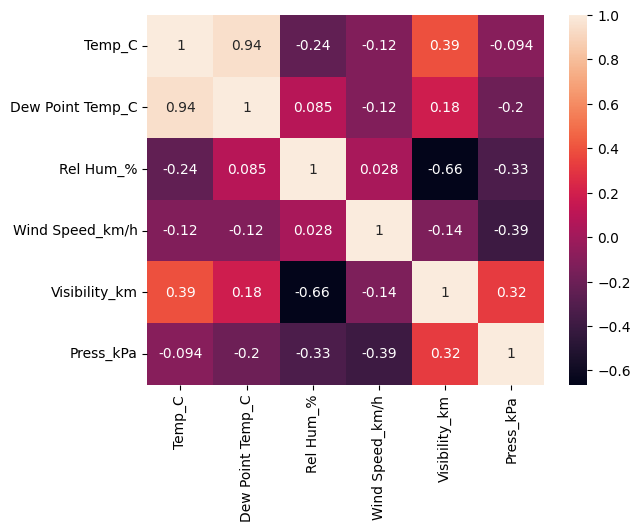

In [ ]:
sns.heatmap(cor_matrix,annot=True)

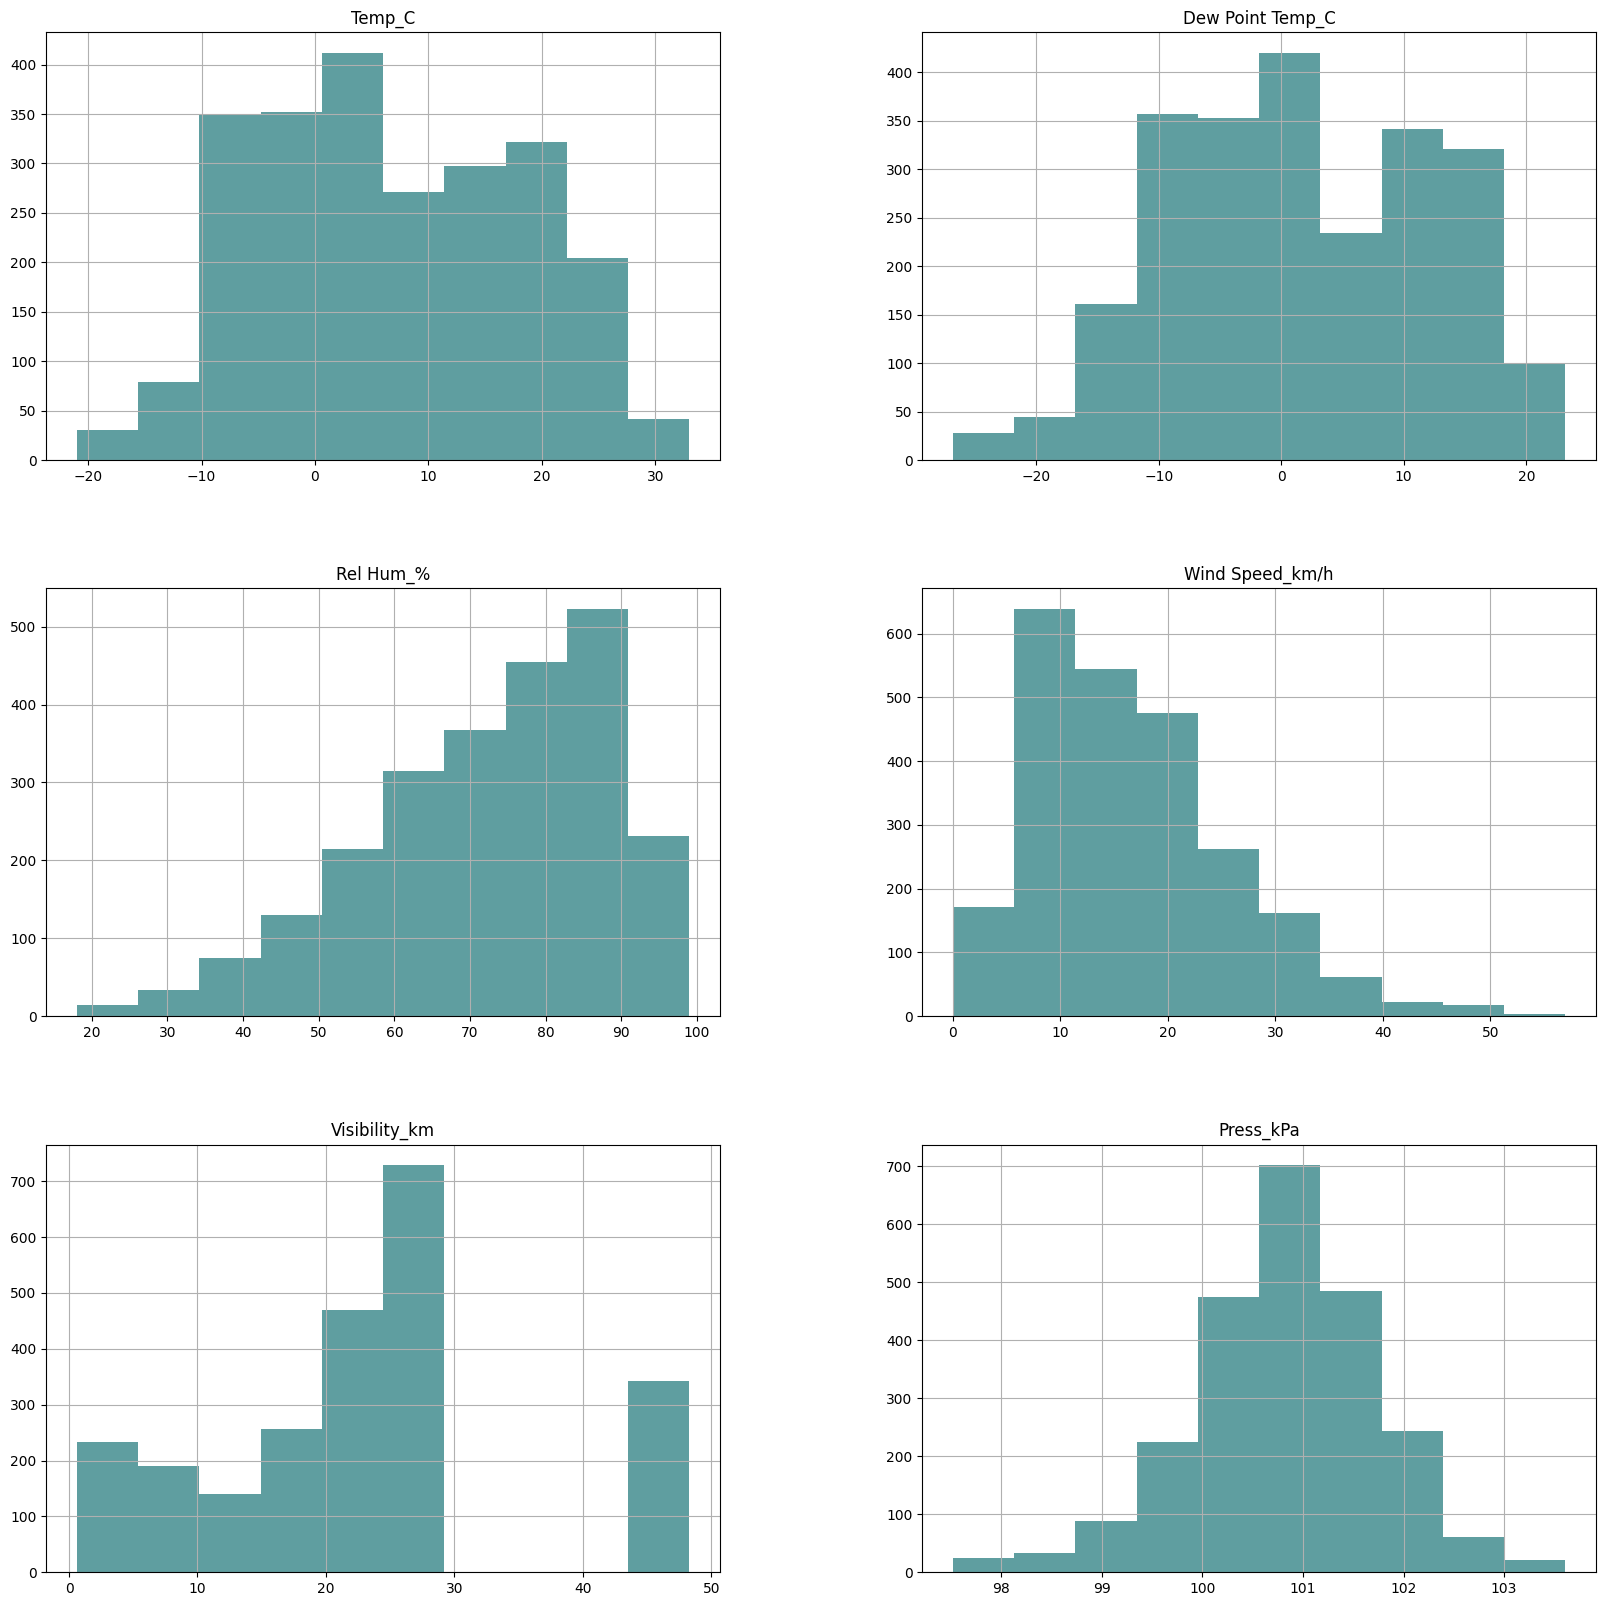

In [ ]:
data_hist_plot=weather_df.hist(figsize=(20,20),color="#5F9EA0")

In [ ]:
num_cols=weather_df.select_dtypes(exclude=['object']).columns.tolist()
num_cols

['Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa']

Boxplot

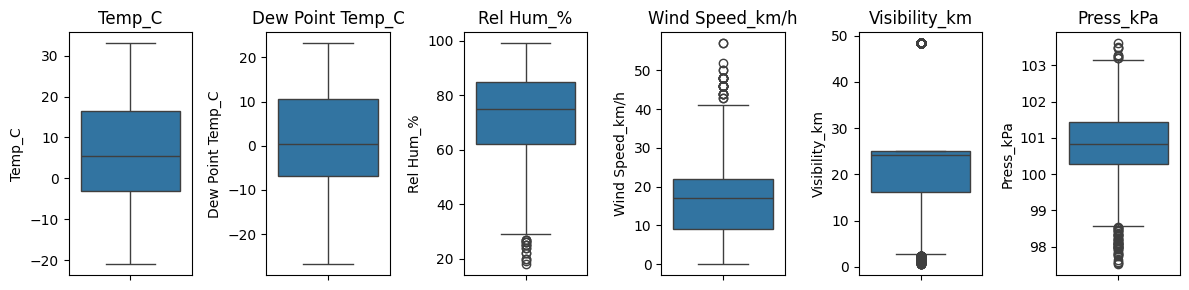

In [ ]:
fig,axes = plt.subplots(ncols=6,figsize=(12,3))
for column,axis in zip(num_cols,axes):
     sns.boxplot(data=weather_df[column],ax=axis)
     axis.set_title(column)
plt.tight_layout()
plt.show()

Label Encoding --> Converting Target Variable into numeric Values

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_Encoder=LabelEncoder()

In [ ]:
weather_df['Std_Weather']=label_Encoder.fit_transform(weather_df['Std_Weather'])

In [ ]:
label_Encoder.classes_

array(['CLEAR', 'CLOUDY', 'RAIN', 'SNOW'], dtype=object)

In [ ]:
cat_code=dict(zip(label_Encoder.classes_,label_Encoder.transform(label_Encoder.classes_)))
cat_code

{'CLEAR': 0, 'CLOUDY': 1, 'RAIN': 2, 'SNOW': 3}

In [ ]:
weather_df.Std_Weather.value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

X,y Variables

In [ ]:
#Independent variable
X=weather_df.drop(['Std_Weather'],axis=1)
#Target variable
y=weather_df['Std_Weather']

Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [ ]:
X_std=std_scaler.fit_transform(X)
X_std

array([[ 1.59616075,  1.55068817, -0.39229132,  0.02408049,  1.97812296,
        -0.16691945],
       [ 1.00786978,  1.14334404,  0.17544808, -0.83014316,  0.07459683,
         0.34043752],
       [-0.6516376 , -0.46708622,  0.68010533, -0.18947542,  0.14538912,
         0.75064104],
       ...,
       [-0.62529621, -0.28709695,  1.31092689,  1.198638  , -1.4435046 ,
        -0.93335233],
       [-0.59895483, -0.31551631,  1.05859827,  1.198638  , -1.05807988,
        -0.97653165],
       [-0.5813939 , -0.34393567,  0.8693518 ,  1.41219391, -0.93222691,
        -0.99812131]])

Split data into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((1887, 6), (472, 6))

Model Building

Logistic regression

In [ ]:
import numpy as np
class MulticlassLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.verbose = verbose
        self.classifiers = {}

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.classes = np.unique(y)
        num_samples, num_features = X.shape

        for c in self.classes:
            binary_y = np.where(y == c, 1, 0)  # Convert to binary labels for class c
            self.classifiers[c] = self.train_binary_classifier(X, binary_y, num_features)

    def train_binary_classifier(self, X, y, num_features):
        weights = np.zeros(num_features)
        bias = 0

        for _ in range(self.num_iterations):
            # Compute predictions
            linear_model = np.dot(X, weights) + bias
            predictions = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / X.shape[0]) * np.dot(X.T, (predictions - y))
            db = (1 / X.shape[0]) * np.sum(predictions - y)

            # Update parameters
            weights -= self.learning_rate * dw
            bias -= self.learning_rate * db

        return weights, bias

    def predict(self, X):
        predictions = []
        for x in X:
            scores = {c: np.dot(x, weights) + bias for c, (weights, bias) in self.classifiers.items()}
            predicted_class = max(scores, key=scores.get)
            predictions.append(predicted_class)
        return predictions



# Instantiate the multiclass logistic regression model
lr = MulticlassLogisticRegression(learning_rate=0.01, num_iterations=1000, verbose=True)

# Train the model
lr.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(x_test)

# Calculate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy :", accuracy)


Accuracy : 0.5635593220338984


Naive Bayes

In [ ]:
import numpy as np
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0)
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for c in self.classes:
                likelihood = np.prod(self.pdf(x, self.mean[c], self.var[c]))
                posterior = likelihood * self.priors[c]
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return predictions

    def pdf(self, x, mean, var):
        return 1 / np.sqrt(2 * np.pi * var) * np.exp(- (x - mean)**2 / (2 * var))

#
nb = GaussianNaiveBayes()

# Train the classifier
nb.fit(x_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(x_test)

# Calculate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)


Accuracy: 0.5826271186440678


KNN

In [ ]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = np.array(y)  # Convert y to a NumPy array

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.argmax(np.bincount(k_nearest_labels))
        return most_common



# Instantiate the KNN classifier
knn = KNNClassifier(k=3)

# Train the classifier
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred =knn.predict(x_test)

# Calculate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6228813559322034


DecisionTree

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        y_np = np.array(y)  # Convert y to a NumPy array
        self.n_classes = len(np.unique(y_np))
        self.n_features = X.shape[1]
        self.tree = self._grow_tree(X, y_np)

    def _best_split(self, X, y):
        best_gini = 1
        best_split = None

        for feature_index in range(self.n_features):
            feature_values = np.unique(X[:, feature_index])
            for threshold in feature_values:
                left_indices = np.where(X[:, feature_index] <= threshold)[0]
                right_indices = np.where(X[:, feature_index] > threshold)[0]

                # Check if either split is empty
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                gini = self._gini_impurity(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_split = {'feature_index': feature_index, 'threshold': threshold,
                                  'left_indices': left_indices, 'right_indices': right_indices}

        return best_split

        # Rest of the class definition remains unchanged

    def _gini_impurity(self, left_labels, right_labels):
        n_left = len(left_labels)
        n_right = len(right_labels)
        n_total = n_left + n_right

        gini_left = 1.0 - sum([(np.sum(left_labels == c) / n_left) ** 2 for c in range(self.n_classes)])
        gini_right = 1.0 - sum([(np.sum(right_labels == c) / n_right) ** 2 for c in range(self.n_classes)])

        gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
        return gini

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))

        # Stopping conditions
        if (self.max_depth is not None and depth >= self.max_depth) or num_labels == 1:
            return {'label': np.argmax(np.bincount(y.astype(int))), 'depth': depth}

        best_split = self._best_split(X, y)

        if best_split is None:
            return {'label': np.argmax(np.bincount(y)), 'depth': depth}

        left = self._grow_tree(X[best_split['left_indices']], y[best_split['left_indices']], depth + 1)
        right = self._grow_tree(X[best_split['right_indices']], y[best_split['right_indices']], depth + 1)

        return {'feature_index': best_split['feature_index'],
                'threshold': best_split['threshold'],
                'left': left, 'right': right,
                'depth': depth}

    def _predict_value(self, x, tree):
        if 'label' in tree:
            return tree['label']
        else:
            feature_value = x[tree['feature_index']]
            branch = tree['left'] if feature_value <= tree['threshold'] else tree['right']
            return self._predict_value(x, branch)

    def predict(self, X):
        predictions = [self._predict_value(sample, self.tree) for sample in X]
        return predictions

dt =DecisionTree(max_depth=3)

# Fit the decision tree classifier to the training data
dt.fit(x_train, y_train)

# Predict labels for the test data
y_pred_tree = dt.predict(x_test)

# Calculate accuracy
accuracy_tree = np.sum(y_pred_tree == y_test) / len(y_test)
print("Decision Tree Accuracy:", accuracy_tree)

Decision Tree Accuracy: 0.5635593220338984


Random Forest

In [ ]:
import numpy as np

class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        num_samples, num_features = X.shape
        if not self.max_features:
            self.max_features = int(np.sqrt(num_features))

        # Convert y to NumPy array
        y = np.array(y)

        for _ in range(self.n_estimators):
            # Randomly select features for this tree
            random_indices = np.random.choice(num_features, self.max_features, replace=False)
            X_subset = X[:, random_indices]

            # Bootstrap sampling (sampling with replacement)
            bootstrap_indices = np.random.choice(num_samples, num_samples, replace=True)
            X_bootstrapped = X_subset[bootstrap_indices]
            y_bootstrapped = y[bootstrap_indices]

            # Train a decision tree on the bootstrapped sample
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_bootstrapped, y_bootstrapped)

            # Add the trained tree to the forest
            self.trees.append((tree, random_indices))

    def predict(self, X):
        # Aggregate predictions from all trees
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for i, (tree, random_indices) in enumerate(self.trees):
            X_subset = X[:, random_indices]
            predictions[:, i] = tree.predict(X_subset)

        # Take majority vote as the final prediction
        final_predictions = np.apply_along_axis(lambda x: np.bincount(x.astype(int)).argmax(), axis=1, arr=predictions)
        return final_predictions

# Create an instance of your ManualRandomForest class and set the desired parameters
rf = RandomForest(n_estimators=100, max_depth=None, max_features=None)

# Fit the random forest classifier to the training data
rf.fit(x_train, y_train)

# Predict labels for the test data
y_pred_rf = rf.predict(x_test)

# Calculate accuracy
accuracy_rf = np.sum(y_pred_rf == y_test) / len(y_test)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.586864406779661


GradientBoost Classifier

In [ ]:
class GradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.weights = []

    def fit(self, X, y):
        y = np.array(y, dtype=int)  # Convert y to integers
        num_samples = X.shape[0]
        self.classes = np.unique(y)
        y_pred = np.zeros(num_samples)

        for _ in range(self.n_estimators):
            # Compute the residuals
            residuals = y - y_pred
            # Round the residuals to the nearest integer
            rounded_residuals = np.round(residuals)
            # Convert y to int
            y_int = y.astype(int)
            # Train a decision tree to fit the residuals
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, rounded_residuals)

            # Make predictions using the current tree
            pred = tree.predict(X)

            # Update the predictions with the new tree's predictions
            y_pred += self.learning_rate * pred[0]

            # Store the model and its weight
            self.models.append(tree)
            self.weights.append(self.learning_rate)

    def predict(self, X):
        # Make predictions using all trees in the ensemble
        predictions = np.zeros((X.shape[0], len(self.classes)))
        for model, weight in zip(self.models, self.weights):
            pred = model.predict(X)
            pred=np.array(pred)
            predictions += weight * pred.reshape(-1, 1)


        # Take the class with the highest score as the final prediction
        final_predictions = np.argmax(predictions, axis=1)
        return final_predictions


gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbc.fit(x_train, y_train)


# Predict using the model
y_pred_GBC =gbc.predict(x_test)
# Accuracy

accuracy_rf =np.sum(y_pred_GBC == y_test) / len(y_test)
print("Accuracy:", accuracy_rf)


Accuracy: 0.5


In [ ]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 29.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


AdaBoost

In [ ]:
class AdaBoostClassifier:
    def __init__(self, n_estimators=100, learning_rate=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        num_samples = X.shape[0]
        sample_weights = np.ones(num_samples) / num_samples

        for _ in range(self.n_estimators):
            # Train a weak learner (e.g., decision tree) on the weighted dataset
            model =DecisionTree(max_depth=1)
            model.fit(X, y)

            # Make predictions using the current weak learner
            pred = model.predict(X)

            # Compute the error of the weak learner
            error = np.sum(sample_weights * (pred != y))

            # Compute the weight of the weak learner in the final ensemble
            alpha = 0.5 * np.log((1 - error) / max(error, 1e-10))

            # Update the sample weights
            sample_weights *= np.exp(-alpha * y * pred)
            sample_weights /= np.sum(sample_weights)

            # Store the weak learner and its weight
            self.models.append(model)
            self.alphas.append(alpha)

    def predict(self, X):
        # Make predictions using all weak learners in the ensemble
        predictions = np.zeros(X.shape[0])
        for model, alpha in zip(self.models, self.alphas):
            pred = model.predict(X)
            predictions = np.multiply(predictions, alpha) + np.multiply(pred, alpha)


        # Take the sign of the sum as the final prediction
        final_predictions = np.sign(predictions)
        return final_predictions

abc = AdaBoostClassifier(n_estimators=100, learning_rate=1)

# Fit the decision tree classifier to the training data
abc.fit(x_train, y_train)

# Predict labels for the test data
y_pred = abc.predict(x_test)

# Calculate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(" Accuracy:", accuracy_tree)





 Accuracy: 0.5635593220338984


SVM

In [ ]:
from itertools import combinations

class SVMClassifier:
    def __init__(self, C=1):
        self.C = C
        self.models = []

    def fit(self, X, y):
        self.classes = np.unique(y)
        num_classes = len(self.classes)

        # Train binary SVM classifiers for all pairs of classes (one-vs-one)
        for class1, class2 in combinations(self.classes, 2):
            # Prepare data for binary classification
            X_binary = X[(y == class1) | (y == class2)]
            y_binary = y[(y == class1) | (y == class2)]
            y_binary = np.where(y_binary == class1, 1, -1)

            # Train a binary SVM classifier
            svm = BinarySVM(C=self.C)
            svm.fit(X_binary, y_binary)

            # Store the trained model
            self.models.append((svm, class1, class2))

    def predict(self, X):
        # Make predictions using all binary SVM classifiers
        predictions = []
        for model, class1, class2 in self.models:
            pred = model.predict(X)
            pred = np.where(pred == 1, class1, class2)
            predictions.append(pred)

        # Voting to determine the final class
        final_predictions = np.array(predictions).T
        final_predictions = np.apply_along_axis(lambda x: np.bincount(x.astype(int)).argmax(), axis=1, arr=final_predictions)
        return final_predictions

class BinarySVM:
    def __init__(self, C=1):
        self.C = C
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent to optimize weights and bias
        learning_rate = 0.01
        iterations = 1000
        for _ in range(iterations):
            for i, x in enumerate(X):
                condition = y[i] * (np.dot(x, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= learning_rate * (2 * self.C * self.weights)
                else:
                    self.weights -= learning_rate * (2 * self.C * self.weights - np.dot(x, y[i]))
                    self.bias -= learning_rate * y[i]

    def predict(self, X):
        predictions = np.sign(np.dot(X, self.weights) - self.bias)
        return predictions.astype(int)

svm = SVMClassifier(C=1)
  # Fit the decision tree classifier to the training data
svm.fit(x_train, y_train)

# Predict labels for the test data
y_pred_SVM = svm.predict(x_test)

# Calculate accuracy
accuracy_SVM = np.sum(y_pred_SVM == y_test) / len(y_test)
print(" Accuracy:", accuracy_SVM)


 Accuracy: 0.5699152542372882


Random Forest Achieved highest accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


Creating objects of each models

In [ ]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()

SVM=SVC()
KNN=KNeighborsClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
NB=GaussianNB()

cross-validation for each classifiers &corresponding cross-validation accuracies.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
models=[LR,NB,KNN,DT,RF,GBC,ABC,SVM]
features=X_std
labels=y
CV=5
accu_list=[]
ModelName=[]
for model in models:
  try :
   model_name=model.__class__.__name__
   accuracies=cross_val_score(model,features,labels,scoring='accuracy',cv=CV)
   accu_list.append(accuracies.mean()*100)
   ModelName.append(model_name)
  except Exception as e:
    print(f"Error with model {model.__class__.__name__}: {e}")
model_acc_df=pd.DataFrame({"Model":ModelName,"Cross_Val_Accuracy":accu_list})
model_acc_df

,Model,Cross_Val_Accuracy
0,LogisticRegression,59.772932
1,GaussianNB,59.177912
2,KNeighborsClassifier,56.932779
3,DecisionTreeClassifier,56.507971
4,RandomForestClassifier,63.503095
5,GradientBoostingClassifier,61.850193
6,AdaBoostClassifier,53.286372
7,SVC,60.791050


In [ ]:
model_acc_df.sort_values(by=['Cross_Val_Accuracy'],ascending=False)

,Model,Cross_Val_Accuracy
4,RandomForestClassifier,63.503095
5,GradientBoostingClassifier,61.850193
7,SVC,60.791050
0,LogisticRegression,59.772932
1,GaussianNB,59.177912
2,KNeighborsClassifier,56.932779
3,DecisionTreeClassifier,56.507971
6,AdaBoostClassifier,53.286372


Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Classification Report

1. Random Forest

In [ ]:
RF.fit(x_train,y_train)
y_pred_rf=RF.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.57      0.69      0.63       118
           1       0.56      0.43      0.48       128
           2       0.75      0.76      0.76       126
           3       0.78      0.79      0.79       100

    accuracy                           0.66       472
   macro avg       0.66      0.67      0.66       472
weighted avg       0.66      0.66      0.66       472



2.Gradient Boosting

In [ ]:
GBC.fit(x_train,y_train)
y_pred_gbc=GBC.predict(x_test)
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64       118
           1       0.50      0.42      0.46       128
           2       0.73      0.74      0.74       126
           3       0.79      0.77      0.78       100

    accuracy                           0.65       472
   macro avg       0.65      0.66      0.65       472
weighted avg       0.65      0.65      0.64       472



3. SVM

In [ ]:
SVM.fit(x_train,y_train)
y_pred_svm=SVM.predict(x_test)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.58      0.76      0.66       118
           1       0.47      0.33      0.39       128
           2       0.73      0.68      0.70       126
           3       0.69      0.76      0.72       100

    accuracy                           0.62       472
   macro avg       0.62      0.63      0.62       472
weighted avg       0.61      0.62      0.61       472



4. Logistic Regression

In [ ]:
LR.fit(x_train,y_train)
y_pred_lr=LR.predict(x_test)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62       118
           1       0.47      0.31      0.37       128
           2       0.69      0.73      0.71       126
           3       0.66      0.77      0.71       100

    accuracy                           0.61       472
   macro avg       0.60      0.62      0.60       472
weighted avg       0.60      0.61      0.60       472



5. Naive Bayes

In [ ]:
NB.fit(x_train,y_train)
y_pred_nb=NB.predict(x_test)
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58       118
           1       0.54      0.22      0.31       128
           2       0.62      0.75      0.68       126
           3       0.61      0.88      0.72       100

    accuracy                           0.59       472
   macro avg       0.58      0.61      0.57       472
weighted avg       0.58      0.59      0.56       472



6. KNN

In [ ]:
KNN.fit(x_train,y_train)
y_pred_knn=KNN.predict(x_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.55      0.73      0.63       118
           1       0.52      0.42      0.47       128
           2       0.76      0.67      0.71       126
           3       0.76      0.76      0.76       100

    accuracy                           0.64       472
   macro avg       0.65      0.65      0.64       472
weighted avg       0.64      0.64      0.63       472



7. Decision Tree

In [ ]:
DT.fit(x_train,y_train)
y_pred_dt=DT.predict(x_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.55      0.58      0.56       118
           1       0.46      0.45      0.45       128
           2       0.69      0.71      0.70       126
           3       0.74      0.69      0.72       100

    accuracy                           0.60       472
   macro avg       0.61      0.61      0.61       472
weighted avg       0.60      0.60      0.60       472



8. AdaBoost

In [ ]:
ABC.fit(x_train,y_train)
y_pred_abc=ABC.predict(x_test)
print(classification_report(y_test,y_pred_abc))

              precision    recall  f1-score   support

           0       0.45      0.34      0.39       118
           1       0.44      0.05      0.10       128
           2       0.43      0.91      0.58       126
           3       0.67      0.67      0.67       100

    accuracy                           0.49       472
   macro avg       0.50      0.49      0.43       472
weighted avg       0.49      0.49      0.42       472



Confusion Matrix

1.Random Forest

<Axes: >

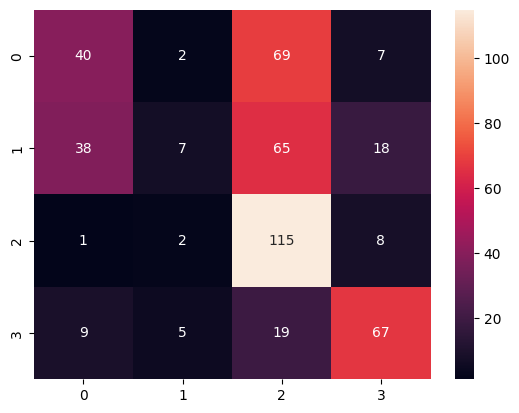

In [ ]:
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,fmt='d')


2.Gradient Boosting

<Axes: >

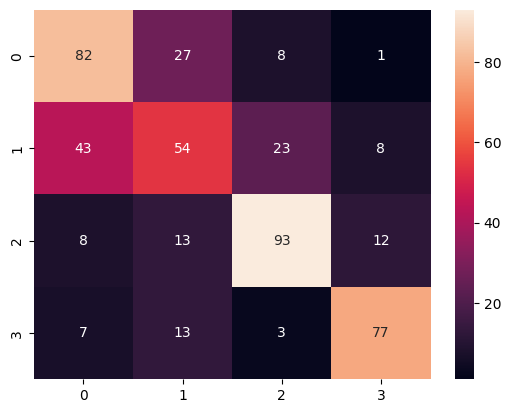

In [ ]:
cm=confusion_matrix(y_test,y_pred_gbc)
sns.heatmap(cm,annot=True,fmt='d')

3. SVM

<Axes: >

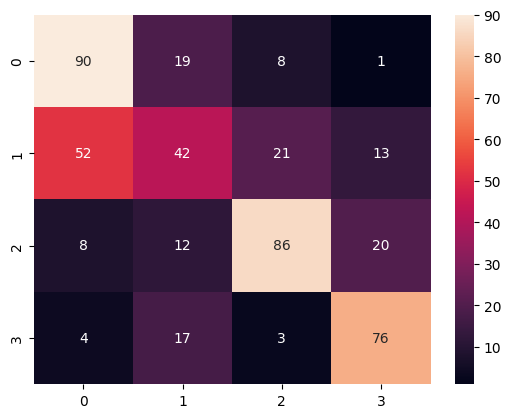

In [ ]:
cm=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm,annot=True,fmt='d')

4. Logistic Regression

<Axes: >

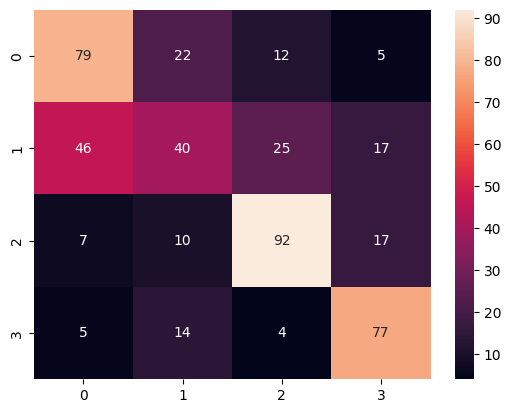

In [ ]:
cm=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d')

5. Naive Bayes

<Axes: >

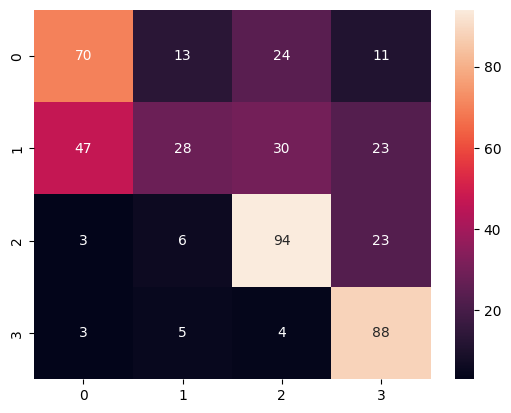

In [ ]:
cm=confusion_matrix(y_test,y_pred_nb)
sns.heatmap(cm,annot=True,fmt='d')

6. KNN

<Axes: >

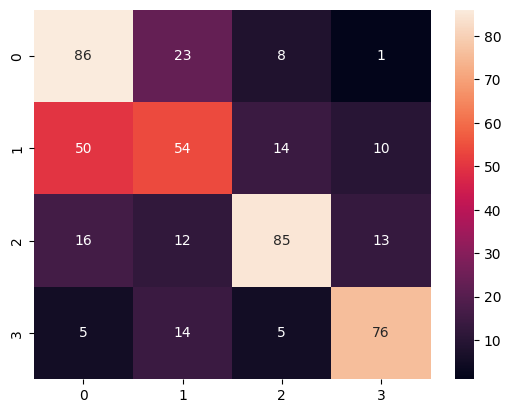

In [ ]:
cm=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm,annot=True,fmt='d')

7. Decision Tree

<Axes: >

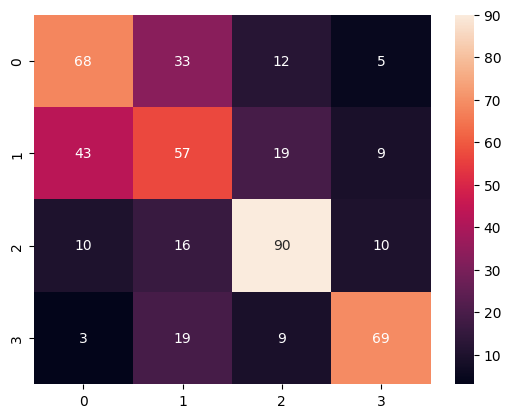

In [ ]:
cm=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm,annot=True,fmt='d')

8. AdaBoost

<Axes: >

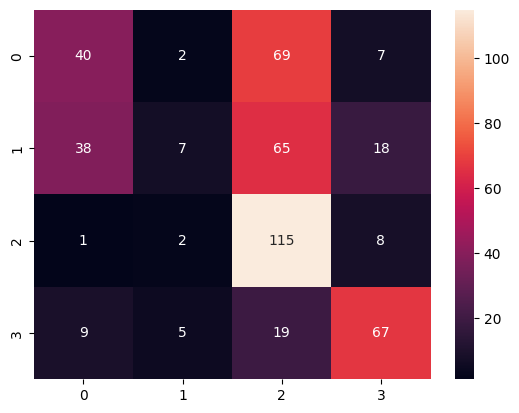

In [ ]:
cm=confusion_matrix(y_test,y_pred_abc)
sns.heatmap(cm,annot=True,fmt='d')

Accuracy vs epoch Graph

1.Random Forest

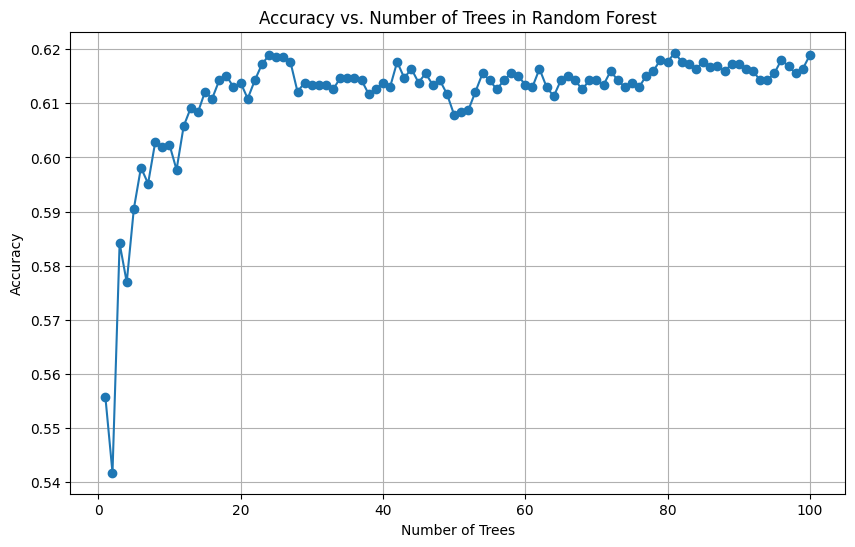

In [ ]:
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the range of number of trees (n_estimators) to be evaluated
num_trees = range(1, 101)

# Initialize an empty list to store cross-validation accuracies
accuracy_scores = []

# Iterate over different number of trees
for n in num_trees:
    # Initialize a Random Forest classifier with 'n' trees
    rf = RandomForestClassifier(n_estimators=n, random_state=42)

    # Perform cross-validation and calculate accuracy scores
    accuracies = cross_val_score(rf, X_std, y, scoring='accuracy', cv=5)

    # Append the mean accuracy to the list
    accuracy_scores.append(np.mean(accuracies))

# Plot the loss graph (accuracy vs. number of trees)
plt.figure(figsize=(10, 6))
plt.plot(num_trees, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


2. Gradient Boost Classifier

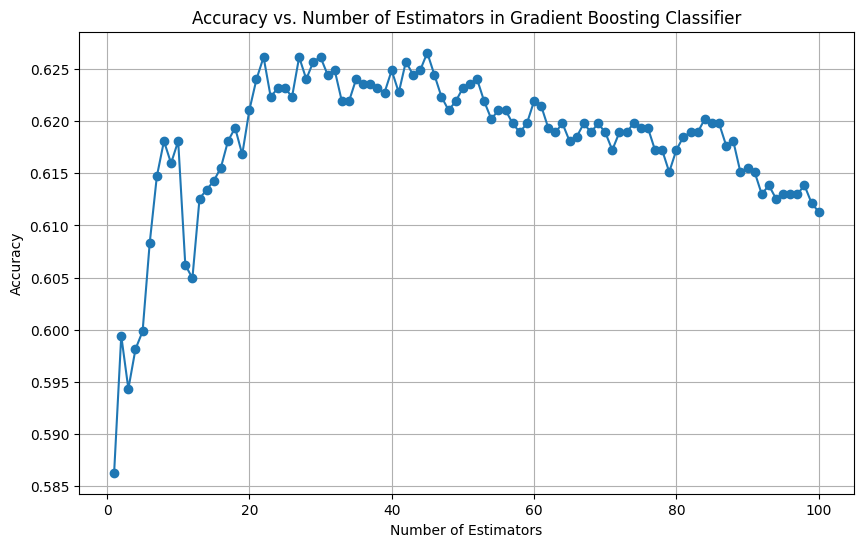

In [ ]:
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Define the range of number of estimators (trees)
n_estimators = range(1, 101)

# Initialize an empty list to store cross-validation accuracies
accuracy_scores = []

# Iterate over different numbers of estimators
for n in n_estimators:
    # Initialize a Gradient Boosting Classifier with the current number of estimators
    gbc = GradientBoostingClassifier(n_estimators=n, random_state=42)

    # Perform cross-validation and calculate accuracy scores
    accuracies = cross_val_score(gbc, X_std, y, scoring='accuracy', cv=5)

    # Append the mean accuracy to the list
    accuracy_scores.append(np.mean(accuracies))

# Plot the loss graph (accuracy vs. number of estimators)
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Estimators in Gradient Boosting Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


3. SVM

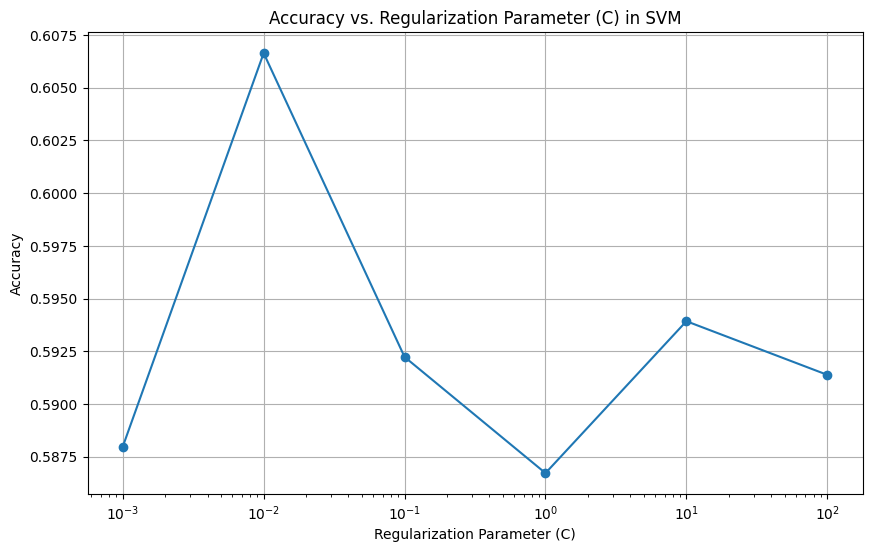

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Define the range of values for the regularization parameter C
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize an empty list to store cross-validation accuracies
accuracy_scores = []

# Iterate over different values of C
for C in C_values:
    # Initialize an SVM classifier with the current value of C
    svm = SVC(C=C, kernel='linear', random_state=42)

    # Perform cross-validation and calculate accuracy scores
    accuracies = cross_val_score(svm, X_std, y, scoring='accuracy', cv=5)

    # Append the mean accuracy to the list
    accuracy_scores.append(np.mean(accuracies))

# Plot the loss graph (accuracy vs. value of C)
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracy_scores, marker='o', linestyle='-')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.title('Accuracy vs. Regularization Parameter (C) in SVM')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


  4. Logistic Regression

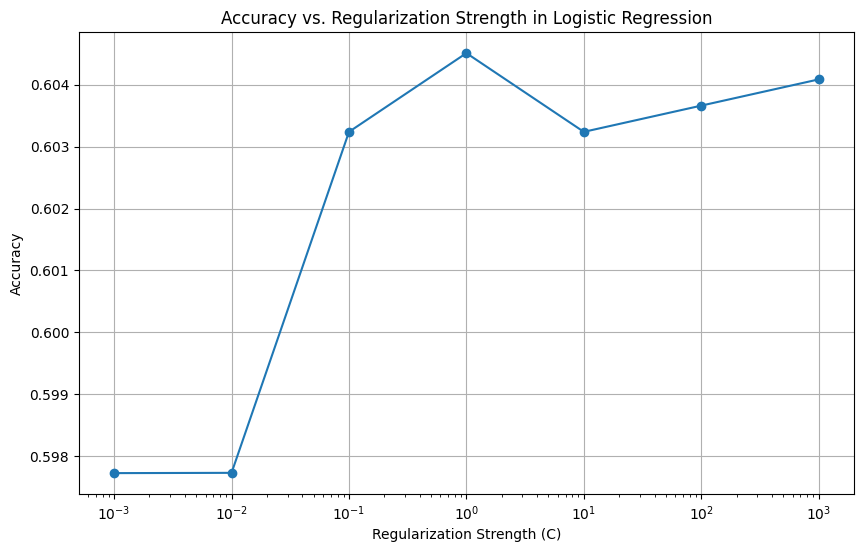

In [ ]:
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the range of regularization strengths (C values) to be evaluated
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Initialize an empty list to store cross-validation accuracies
accuracy_scores = []

# Iterate over different regularization strengths
for C in C_values:
    # Initialize a Logistic Regression classifier with the current regularization strength
    lr = LogisticRegression(C=C, random_state=42)

    # Perform cross-validation and calculate accuracy scores
    accuracies = cross_val_score(lr, X_std, y, scoring='accuracy', cv=5)

    # Append the mean accuracy to the list
    accuracy_scores.append(np.mean(accuracies))

# Plot the loss graph (accuracy vs. regularization strength)
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracy_scores, marker='o', linestyle='-')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.title('Accuracy vs. Regularization Strength in Logistic Regression')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


 5.Naive Bayes

  6.KNN

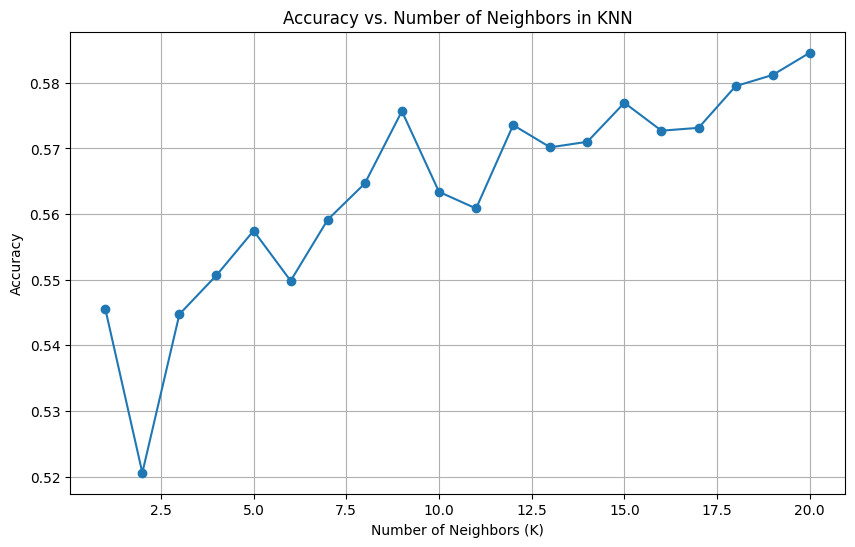

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define the range of values for K (number of neighbors)
k_values = range(1, 21)

# Initialize an empty list to store cross-validation accuracies
accuracy_scores = []

# Iterate over different values of K
for k in k_values:
    # Initialize a KNN classifier with the current value of K
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation and calculate accuracy scores
    accuracies = cross_val_score(knn, X_std, y, scoring='accuracy', cv=5)

    # Append the mean accuracy to the list
    accuracy_scores.append(np.mean(accuracies))

# Plot the loss graph (accuracy vs. number of neighbors)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors in KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


 7. DT

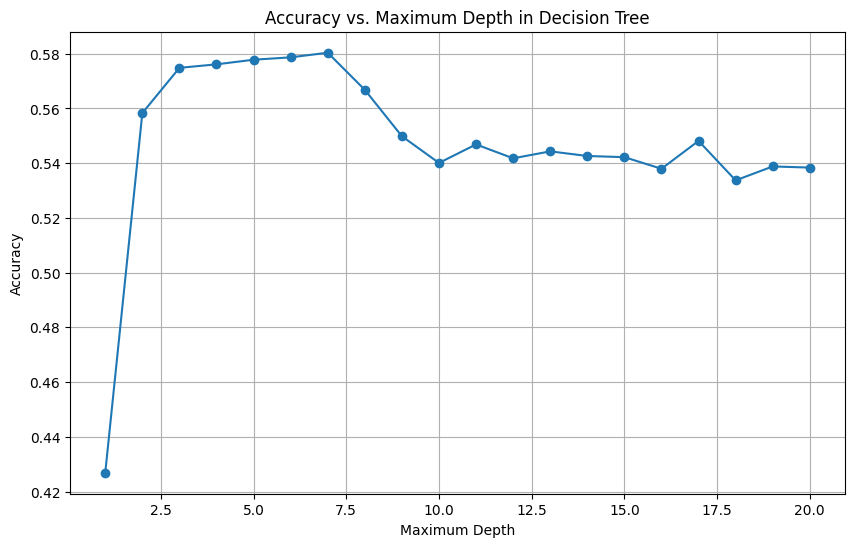

In [ ]:
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define the range of maximum depths to be evaluated
max_depths = range(1, 21)

# Initialize an empty list to store cross-validation accuracies
accuracy_scores = []

# Iterate over different maximum depths
for depth in max_depths:
    # Initialize a Decision Tree classifier with the current maximum depth
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Perform cross-validation and calculate accuracy scores
    accuracies = cross_val_score(dt, X_std, y, scoring='accuracy', cv=5)

    # Append the mean accuracy to the list
    accuracy_scores.append(np.mean(accuracies))

# Plot the loss graph (accuracy vs. maximum depth)
plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Maximum Depth in Decision Tree')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


8. Ada Boost Classifier

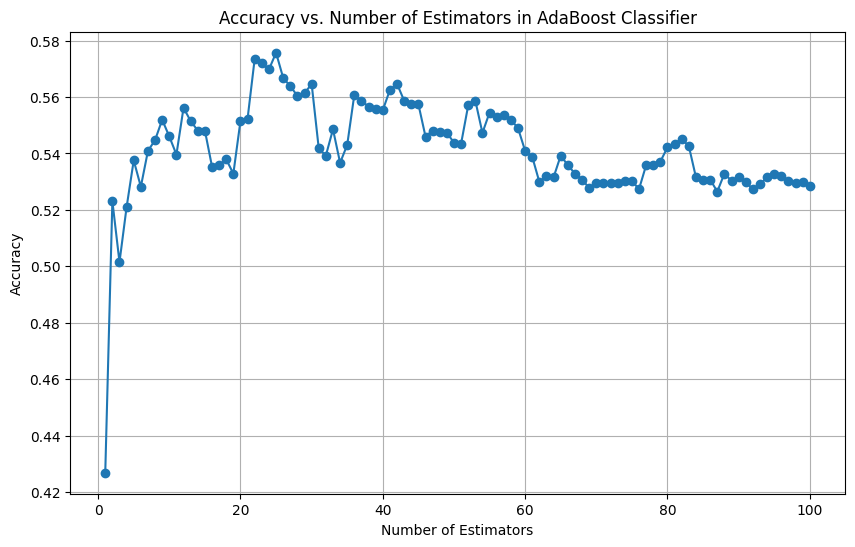

In [ ]:
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# Define the range of number of estimators (base learners)
n_estimators = range(1, 101)

# Initialize an empty list to store cross-validation accuracies
accuracy_scores = []

# Iterate over different numbers of estimators
for n in n_estimators:
    # Initialize an AdaBoost Classifier with the current number of estimators
    abc = AdaBoostClassifier(n_estimators=n, random_state=42)

    # Perform cross-validation and calculate accuracy scores
    accuracies = cross_val_score(abc, X_std, y, scoring='accuracy', cv=5)

    # Append the mean accuracy to the list
    accuracy_scores.append(np.mean(accuracies))

# Plot the loss graph (accuracy vs. number of estimators)
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Estimators in AdaBoost Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


ROC and AUC

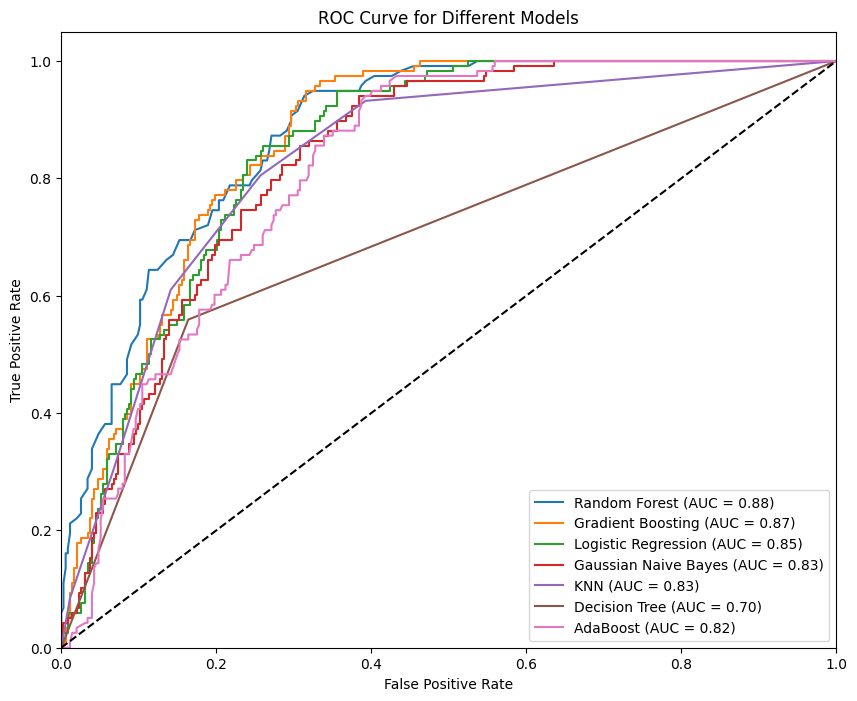

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define models
models = [RF, GBC, SVM, LR, NB, KNN, DT, ABC]
model_names = [ "Random Forest",  "Gradient Boosting",
                "SVM","Logistic Regression",
                "Gaussian Naive Bayes","KNN","Decision Tree","AdaBoost"]

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))
for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    if hasattr(model, "predict_proba"):
        prob = model.predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, prob[:, 0], pos_label=0)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc="lower right")
plt.show()

Validation Graph of Random  Forest

In [ ]:
import warnings
warnings.filterwarnings('ignore')
 # Load libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
#models=[LR,DT,RF,ETC,SVM,KNN,GBC,ABC,NB]
features=X_std
labels=y
CV=5
param_range=np.arange(1,200)
#accu_list=[]
#ModelName=[]
#for model in models:
   #model_name=model._class.name_
train_scores, test_scores = validation_curve(Random_forest_model_new,features,labels,
                                               param_name= "n_estimators",param_range=param_range,
                                               cv=CV,scoring='accuracy',n_jobs=-1)
print(train_scores)
print(test_scores)
# Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(4,4))
plt.plot(param_range, train_mean, label='Training Score', color='black')
plt.plot(param_range, test_mean, label='Cross-Validation Score', color='red')

   # Plot accuracy bonds for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='gray')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='gainsboro')

   #Create plot
plt.title('Validation Curve for Random Forests')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Scores')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

Hyperparameter tunning:Model tunning

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
parameters={
    'n_estimators' : [50,100],
    'max_features' : ['sqrt','log2'],
    "criterion" :["gini",'entropy']
}

In [ ]:
grid_search=GridSearchCV(estimator=RF,param_grid=parameters)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100]})

In [ ]:
GridSearchCV(estimator=RandomForestClassifier(),
              param_grid={'criterion':['gini','entropy'],
                          'max_features' : ['sqrt','log2'],
                          'n_estimators' : [50,100]})

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100]})

Best Hyper Parameters

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
Random_forest_model_new=RandomForestClassifier(criterion='entropy',max_features='log2',n_estimators=100)

Model Tunning: Best Hyper Models

In [ ]:
Random_forest_model_new.fit(x_train,y_train)
y_pred_rf=Random_forest_model_new.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.663135593220339

In [ ]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
1427,-4.7,-12.5,54,15,24.1,102.24,1
1719,12.4,0.6,44,4,48.3,101.71,1
1236,0.0,-6.8,60,19,48.3,101.38,1
2429,0.7,-0.8,90,6,24.1,100.40,1
6476,13.8,7.8,67,15,25.0,101.22,1


Ablation Study

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the base classifier
base_model = RandomForestClassifier()

# Perform train-test split
x_train_abl, x_test_abl, y_train_abl, y_test_abl = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Train the base classifier
base_model.fit(x_train_abl, y_train_abl)

# Evaluate the base classifier
base_accuracy = accuracy_score(y_test_abl, base_model.predict(x_test_abl))
print("Base Model Accuracy:", base_accuracy)

# Define the features for ablation study (e.g., removing one feature at a time)
features_for_ablation = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
ablation_results = {}

# Perform ablation study
for feature in features_for_ablation:
    # Create a copy of the standardized features
    x_train_abl_temp = x_train_abl.copy()
    x_test_abl_temp = x_test_abl.copy()

    # Remove the feature for ablation
    feature_index = X.columns.get_loc(feature)
    x_train_abl_temp[:, feature_index] = 0
    x_test_abl_temp[:, feature_index] = 0

    # Train the classifier without the ablated feature
    ablated_model = RandomForestClassifier()
    ablated_model.fit(x_train_abl_temp, y_train_abl)

    # Evaluate the classifier
    ablated_accuracy = accuracy_score(y_test_abl, ablated_model.predict(x_test_abl_temp))
    ablation_results[feature] = ablated_accuracy

# Display the ablation study results
print("\nAblation Study Results:")
for feature, accuracy in ablation_results.items():
    print(f"{feature}: {accuracy}")


Base Model Accuracy: 0.6652542372881356

Ablation Study Results:
Temp_C: 0.6588983050847458
Dew Point Temp_C: 0.6716101694915254
Rel Hum_%: 0.6652542372881356
Wind Speed_km/h: 0.652542372881356
Visibility_km: 0.625
Press_kPa: 0.6461864406779662


In [ ]:
df_1 = data[data['Std_Weather']=='CLOUDY']
df_2 = data[data['Std_Weather']=='CLEAR']
df_3 = data[data['Std_Weather']=='RAIN']
df_4 = data[data['Std_Weather']=='SNOW']


In [ ]:
final_df = pd.concat([df_1, df_2, df_3, df_4], axis=0)

In [ ]:
final_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy,CLOUDY
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy,CLOUDY
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy,CLOUDY
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy,CLOUDY
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy,CLOUDY


In [ ]:
final_df['Std_Weather'].value_counts()

Std_Weather
CLOUDY    3797
CLEAR     3432
RAIN       603
SNOW       556
Name: count, dtype: int64

In [ ]:
final_df.drop(columns=['Date/Time','Weather'],axis=1,inplace=True)

In [ ]:
final_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
16,2.6,-0.2,82,13,12.9,99.93,CLOUDY
17,3.0,0.0,81,13,16.1,99.81,CLOUDY
20,3.2,1.3,87,19,25.0,99.50,CLOUDY
21,4.0,1.7,85,20,25.0,99.39,CLOUDY
23,5.3,2.0,79,30,25.0,99.31,CLOUDY


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_Encoder=LabelEncoder()

In [ ]:
final_df['Std_Weather']=label_Encoder.fit_transform(final_df['Std_Weather'])

In [ ]:
final_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
16,2.6,-0.2,82,13,12.9,99.93,1
17,3.0,0.0,81,13,16.1,99.81,1
20,3.2,1.3,87,19,25.0,99.50,1
21,4.0,1.7,85,20,25.0,99.39,1
23,5.3,2.0,79,30,25.0,99.31,1


In [ ]:
X = final_df.drop(columns = ['Std_Weather'])

In [ ]:
y = final_df['Std_Weather']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### **Keeping features untouched i.e.(Without Normalization)**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       675
           1       0.68      0.72      0.70       752
           2       0.70      0.50      0.58       117
           3       0.94      0.76      0.84       134

    accuracy                           0.72      1678
   macro avg       0.76      0.68      0.71      1678
weighted avg       0.72      0.72      0.72      1678



In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [ ]:
X_std=std_scaler.fit_transform(X)

In [ ]:
X_std

array([[-0.53512566, -0.24091546,  0.96131955, -0.2373173 , -1.31280404,
        -1.34847245],
       [-0.50133537, -0.22274902,  0.9002478 , -0.2373173 , -1.04626363,
        -1.49118568],
       [-0.48444023, -0.10466713,  1.26667834,  0.45267144, -0.30494814,
        -1.85986152],
       ...,
       [-0.79700037, -0.35899735,  1.63310888,  1.48765456, -1.98748443,
        -1.32468691],
       [-0.77165766, -0.38624702,  1.38882185,  1.48765456, -1.57934444,
        -1.37225798],
       [-0.75476251, -0.41349668,  1.20560658,  1.7176508 , -1.44607424,
        -1.39604352]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=42)

### **Normalising the features**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       675
           1       0.69      0.72      0.70       752
           2       0.69      0.50      0.58       117
           3       0.93      0.78      0.85       134

    accuracy                           0.72      1678
   macro avg       0.76      0.69      0.72      1678
weighted avg       0.72      0.72      0.72      1678



In [ ]:
final_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
16,2.6,-0.2,82,13,12.9,99.93,1
17,3.0,0.0,81,13,16.1,99.81,1
20,3.2,1.3,87,19,25.0,99.50,1
21,4.0,1.7,85,20,25.0,99.39,1
23,5.3,2.0,79,30,25.0,99.31,1


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming final_df is your DataFrame with features and the output feature 'Std_Weather'

# Separate features and target variable
X = final_df.drop('Std_Weather', axis=1)
y = final_df['Std_Weather']

# Instantiate SMOTE
smote = SMOTE()

# Fit SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Std_Weather'] = y_resampled


In [ ]:
resampled_df['Std_Weather'].value_counts()

Std_Weather
1    3797
0    3797
2    3797
3    3797
Name: count, dtype: int64

In [ ]:
X = resampled_df.drop(columns = ['Std_Weather'])

In [ ]:
y = resampled_df['Std_Weather']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### **After using SMOTE over-sampling**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
prob = RF.predict_proba(x_test)
print(prob)
print(classification_report(y_test,y_pred))

[[0.   0.02 0.01 0.97]
 [0.67 0.33 0.   0.  ]
 [0.   0.   1.   0.  ]
 ...
 [0.9  0.1  0.   0.  ]
 [0.01 0.04 0.   0.95]
 [0.01 0.06 0.   0.93]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       800
           1       0.72      0.66      0.69       761
           2       0.90      0.94      0.92       785
           3       0.94      0.97      0.96       692

    accuracy                           0.84      3038
   macro avg       0.83      0.84      0.84      3038
weighted avg       0.83      0.84      0.83      3038



In [ ]:
# x_test[3]

In [ ]:
import pickle
from google.colab import files
with open('Prediction_Model.pkl', 'wb') as f:
    pickle.dump(RF, f)
files.download('Prediction_Model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
scaler = joblib.load('scaler.pkl')


In [ ]:
input_data = {
        'Temp_C': 2.6,
        'Dew Point Temp_C': -0.2,
        'Rel Hum_%': 82,
        'Wind Speed_km/h': 13,
        'Visibility_km': 12.9,
        'Press_kPa': 99.93
    }

    # Convert input data to DataFrame
input_df = pd.DataFrame([input_data])

new_scaled_data = scaler.transform(input_df)

In [ ]:
new_scaled_data

array([[-0.33216736, -0.14330584,  0.62271592, -0.37989878, -0.79898916,
        -0.98149892]])

In [ ]:
y_pred=RF.predict(new_scaled_data)

In [ ]:
print(y_pred)

[3 0 2 ... 0 3 3]


In [ ]:
x_train

array([[-0.40565785, -0.09579011,  1.12787332,  0.27206762, -0.54653593,
        -1.01721701],
       [ 1.24398496,  1.11231614, -0.64017758,  0.38072869,  1.99377477,
        -1.24001689],
       [ 1.16258685,  1.5451955 ,  0.9384393 , -1.46650944, -0.38868605,
        -0.13722804],
       ...,
       [ 1.05026791,  1.25500046,  0.4332819 , -0.37989878,  0.08459717,
        -0.20594499],
       [-0.55230036, -0.98989945, -1.39791368,  0.27206762,  0.15559964,
         0.42349008],
       [-0.36738864, -0.10525669,  0.9384393 , -1.14052624, -0.79898916,
         1.06416506]])

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [ ]:
X_std=std_scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=42)

In [ ]:
x_train

array([[-0.40565785, -0.09579011,  1.12787332,  0.27206762, -0.54653593,
        -1.01721701],
       [ 1.24398496,  1.11231614, -0.64017758,  0.38072869,  1.99377477,
        -1.24001689],
       [ 1.16258685,  1.5451955 ,  0.9384393 , -1.46650944, -0.38868605,
        -0.13722804],
       ...,
       [ 1.05026791,  1.25500046,  0.4332819 , -0.37989878,  0.08459717,
        -0.20594499],
       [-0.55230036, -0.98989945, -1.39791368,  0.27206762,  0.15559964,
         0.42349008],
       [-0.36738864, -0.10525669,  0.9384393 , -1.14052624, -0.79898916,
         1.06416506]])

### **After performing normalization and SMOTE oversampling**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       800
           1       0.70      0.66      0.68       761
           2       0.90      0.93      0.92       785
           3       0.95      0.96      0.96       692

    accuracy                           0.83      3038
   macro avg       0.83      0.83      0.83      3038
weighted avg       0.83      0.83      0.83      3038



In [ ]:
import joblib

joblib.dump(std_scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
x_train.shape

(12150, 6)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
 # Load libraries
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
features=X_std
labels=y
CV=5
param_range=np.arange(1,200)
RF=RandomForestClassifier()
train_scores, test_scores = validation_curve(RF,features,labels,
                                               param_name= "n_estimators",param_range=param_range,
                                               cv=CV,scoring='accuracy',n_jobs=-1)
print(train_scores)
print(test_scores)
# Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(4,4))
plt.plot(param_range, train_mean, label='Training Score', color='black')
plt.plot(param_range, test_mean, label='Cross-Validation Score', color='red')

   # Plot accuracy bonds for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='gray')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='gainsboro')

   #Create plot
plt.title('Validation Curve for Random Forests')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Scores')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [ ]:
Temp=float(input('Enter the Temp_C = '))
dpt=float(input('Enter the Dew Point Temp_C = '))
rh=float(input('Enter the Relative HUmidity % = '))
ws=float(input('Enter the Wind Speed Km/h = '))
vs=float(input('Enter the Visibility_km = '))
pr=float(input('Enter the Pressure_Kpa = '))

Enter the Temp_C = 36
Enter the Dew Point Temp_C = 24
Enter the Relative HUmidity % = 59
Enter the Wind Speed Km/h = 25
Enter the Visibility_km = 24
Enter the Pressure_Kpa = 100


In [ ]:
input_data=[Temp,dpt,rh,ws,vs,pr]
scaled_data=std_scaler.transform([input_data])
prediction=Random_forest_model_new.predict(scaled_data)
prediction

array([0])

In [ ]:
if prediction[0]==0:
  print("Weather is 'CLEAR' ")
elif prediction[0]==1:
  print("Weather is 'CLOUDY' ")
elif prediction[0]==2:
  print("Weather is 'RAINY' ")
else:
  print("Weather is 'SNOWY'")

Weather is 'CLEAR' 


Weather Predictive system-Random Forest Model

In [ ]:
Temp=float(input('Enter the Temp_C = '))
dpt=float(input('Enter the Dew Point Temp_C = '))
rh=float(input('Enter the Relative HUmidity % = '))
ws=float(input('Enter the Wind Speed Km/h = '))
vs=float(input('Enter the Visibility_km = '))
pr=float(input('Enter the Pressure_Kpa = '))

input_data=[Temp,dpt,rh,ws,vs,pr]
scaled_data=std_scaler.transform([input_data])
prediction=Random_forest_model_new.predict(scaled_data)
prediction


print("")
print("**********************Weather Prediction Machine Learning Model****************************************")
print("")



if prediction[0]==0:
  print("Weather is 'CLEAR' ")
elif prediction[0]==1:
  print("Weather is 'CLOUDY' ")
elif prediction[0]==2:
  print("Weather is 'RAINY' ")
else:
  print("Weather is 'SNOWY'")

Enter the Temp_C = 36
Enter the Dew Point Temp_C = 24
Enter the Relative HUmidity % = 59
Enter the Wind Speed Km/h = 25
Enter the Visibility_km = 24
Enter the Pressure_Kpa = 100

**********************Weather Prediction Machine Learning Model****************************************

Weather is 'CLEAR' 
